In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('../data/online_retail_II.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


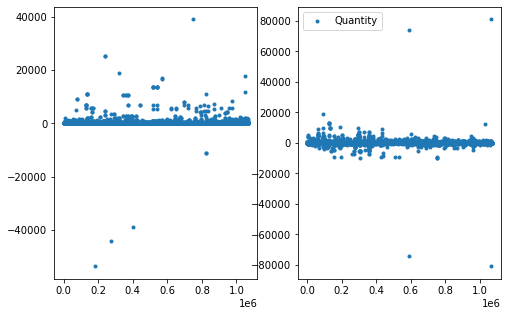

In [5]:
figure, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(8, 5), squeeze=True)
axes[0].plot(df['Price'], '.', label='Price')
axes[1].plot(df['Quantity'], '.', label='Quantity')
plt.legend()
plt.show()

Price and quantity values cannot be negative, so we need to remove negative points

## Data cleanup

In [6]:
# drop rows with null values
df_no_null = df.dropna(axis=0)
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   Price        824364 non-null  float64
 6   Customer ID  824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


In [7]:
# drop negative price and quantity values
df_no_negatives = df_no_null[df_no_null['Price']>0]
df_no_negatives = df_no_negatives[df_no_negatives['Quantity']>0]
df_no_negatives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [8]:
# change InvoiceDate to datetime object
df_no_negatives['InvoiceDate'] = pd.to_datetime(df_no_negatives['InvoiceDate']).dt.date
df_no_negatives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [10]:
# create a column expense = price * quantity
df_no_negatives['expense'] = df_no_negatives['Price']*df_no_negatives['Quantity']

In [11]:
most_recent_purchase = df_no_negatives.groupby('Customer ID')['InvoiceDate'].max()
total_numer_purchases = df_no_negatives.groupby('Customer ID')['Invoice'].count()
total_expense =  df_no_negatives.groupby('Customer ID')['expense'].sum()
country = df_no_negatives.groupby('Customer ID')['Country'].apply(lambda x: x.unique()[0])

df_agg = pd.concat([most_recent_purchase, total_numer_purchases, total_expense, country], axis=1)
df_agg.reset_index(inplace=True)
# rename column names
df_agg.set_axis(['customer_id', 'most_recent_purchase', 'total_number_of_purchase', 'total_expense', 'country'], axis=1, inplace=True)
df_agg.head()

,customer_id,most_recent_purchase,total_number_of_purchase,total_expense,country
0,12346.0,2011-01-18,34,77556.46,United Kingdom
1,12347.0,2011-12-07,253,5633.32,Iceland
2,12348.0,2011-09-25,51,2019.40,Finland
3,12349.0,2011-11-21,175,4428.69,Italy
4,12350.0,2011-02-02,17,334.40,Norway


In [12]:
from datetime import datetime
df_agg['date_diff'] = (datetime.strptime('2011-12-31', '%Y-%m-%d').date() - df_agg['most_recent_purchase']).dt.days
df_agg.head()

,customer_id,most_recent_purchase,total_number_of_purchase,total_expense,country,date_diff
0,12346.0,2011-01-18,34,77556.46,United Kingdom,347
1,12347.0,2011-12-07,253,5633.32,Iceland,24
2,12348.0,2011-09-25,51,2019.40,Finland,97
3,12349.0,2011-11-21,175,4428.69,Italy,40
4,12350.0,2011-02-02,17,334.40,Norway,332


In [13]:
date_diff_quantiles = df_agg['date_diff'].quantile([0.25, 0.5, 0.75]).to_list()
total_num_purchase_qtls = df_agg['total_number_of_purchase'].quantile([0.25, 0.5, 0.75]).to_list()
total_expense_qtls = df_agg['total_expense'].quantile([0.25, 0.5, 0.75]).to_list()

# recency level
df_agg.loc[df_agg['date_diff']< date_diff_quantiles[0], 'recency_level'] = 1
df_agg.loc[(date_diff_quantiles[0]<df_agg['date_diff']) & (df_agg['date_diff']<date_diff_quantiles[1]), 'recency_level'] = 2
df_agg.loc[(date_diff_quantiles[1]<df_agg['date_diff']) & (df_agg['date_diff']<date_diff_quantiles[2]), 'recency_level'] = 3
df_agg.loc[date_diff_quantiles[2]<df_agg['date_diff'], 'recency_level'] = 4 

# frequency level
df_agg.loc[df_agg['total_number_of_purchase']< total_num_purchase_qtls[0], 'frequency_level'] = 4
df_agg.loc[(total_num_purchase_qtls[0]<df_agg['total_number_of_purchase']) & (df_agg['total_number_of_purchase']<total_num_purchase_qtls[1]), 'frequency_level'] = 3
df_agg.loc[(total_num_purchase_qtls[1]<df_agg['total_number_of_purchase']) & (df_agg['total_number_of_purchase']<total_num_purchase_qtls[2]), 'frequency_level'] = 2
df_agg.loc[total_num_purchase_qtls[2]<df_agg['total_number_of_purchase'], 'frequency_level'] = 1

# monetary level
df_agg.loc[df_agg['total_expense']< date_diff_quantiles[0], 'total_expense_level'] = 4
df_agg.loc[(date_diff_quantiles[0]<df_agg['total_expense']) & (df_agg['total_expense']<date_diff_quantiles[1]), 'total_expense_level'] = 3
df_agg.loc[(date_diff_quantiles[1]<df_agg['total_expense']) & (df_agg['total_expense']<date_diff_quantiles[2]), 'total_expense_level'] = 2
df_agg.loc[date_diff_quantiles[2]<df_agg['total_expense'], 'total_expense_level'] = 1



In [14]:
# high_value customers are those who are in total_expense_level 1 and 2, and frequency_level 1 and 2.
#  high_value churned customers are in group R4-1-1, R4-2-1, R4-1-2, R4-2-2
df_high_value_churned_customers = df_agg[(df_agg['recency_level']==4) & ((df_agg['frequency_level']==1)|(df_agg['frequency_level']==2)) & ((df_agg['total_expense_level']==1)|(df_agg['total_expense_level']==2))]
df_high_value_churned_customers .reset_index(inplace=True)

# high monetary value almost churned customers are in group R3-1-1, R3-2-1, R3-1-2, R3-2-2
df_high_value_almost_churned_customers = df_agg[(df_agg['recency_level']==3) & ((df_agg['frequency_level']==1)|(df_agg['frequency_level']==2)) & ((df_agg['total_expense_level']==1)|(df_agg['total_expense_level']==2))]

# high value customers 
df_high_values = df_agg[((df_agg['frequency_level']==1)|(df_agg['frequency_level']==2)) & ((df_agg['total_expense_level']==1)|(df_agg['total_expense_level']==2))]

# best customer who are in group 1-1-1
df_best_customers = df_agg[(df_agg['recency_level']==1) & (df_agg['frequency_level']==1) & (df_agg['total_expense_level']==1)]

In [15]:
# create feature churned 
df_agg.loc[(df_agg['recency_level']==4) & ((df_agg['frequency_level']==1)|(df_agg['frequency_level']==2)) & ((df_agg['total_expense_level']==1)|(df_agg['total_expense_level']==2)), 'high_value_churned']=1
df_agg.loc[df_agg['high_value_churned'] != 1, 'high_value_churned'] = 0

In [16]:
num_churned = df_high_value_churned_customers.shape[0]
num_near_churned = df_high_value_almost_churned_customers.shape[0]
num_unchurned = df_agg.shape[0] - num_churned - num_near_churned 

num_high_values = df_high_values.shape[0]
others = df_agg.shape[0] - num_high_values

num_best_customers = df_best_customers.shape[0]


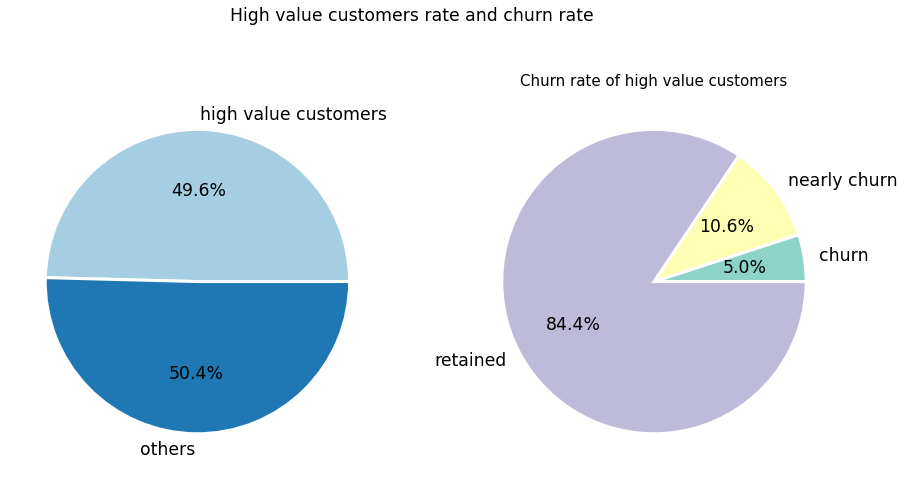

In [17]:
qualitative_colors = sns.color_palette("Set3", 10) 
# sequential_colors = sns.color_palette("RdPu", 10)

figure, axes = plt.subplots(1, 2, figsize=(15, 8))
figure.suptitle('High value customers rate and churn rate', fontsize='xx-large')
axes[0].pie(x=[num_high_values, others], labels=['high value customers', 'others'],  autopct='%.1f%%',
            colors=sns.color_palette("Paired", 9),
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'xx-large'})
axes[1].pie(x=[num_churned, num_near_churned, num_unchurned], labels=['churn', 'nearly churn', 'retained'],  autopct='%.1f%%',
            colors=qualitative_colors,
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'xx-large'})

axes[1].set_title('Churn rate of high value customers', fontsize=15)

plt.show()

<font size=3>In high value customers, where did they come from? <font>

In [18]:
df_high_values_by_country = df_high_values.groupby('country')['customer_id'].count().to_frame()
df_high_values_by_country.sort_values(by='customer_id', ascending=False, inplace=True)
df_high_values_by_country.reset_index(inplace=True)
df_high_values_by_country_no_uk = df_high_values_by_country[df_high_values_by_country['country']!='United Kingdom']


num_non_uk = df_high_values_by_country_no_uk['customer_id'].sum()
num_uk = df_high_values_by_country['customer_id'].sum()- num_non_uk

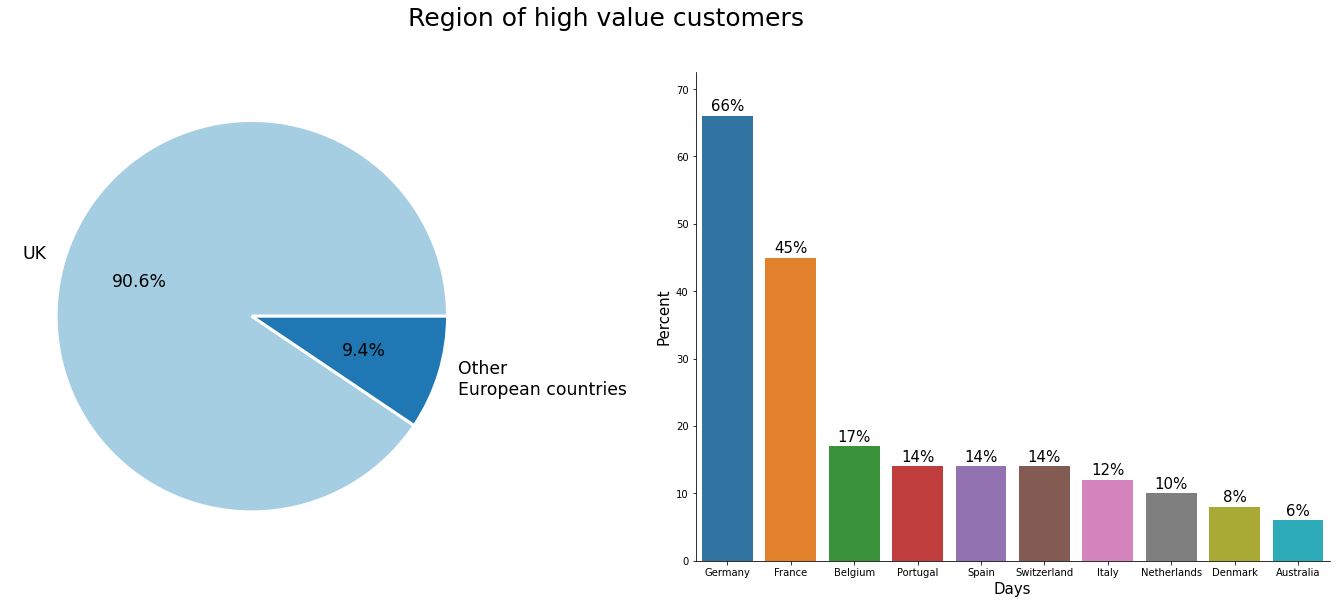

In [42]:
fg, axes = plt.subplots(1, 2, figsize=(25, 9))

axes[0].pie(x=[num_uk, num_non_uk], labels=['UK', 'Other\nEuropean countries'],  autopct='%.1f%%',
            colors=sns.color_palette("Paired", 9),
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'xx-large'})
# sns.set_context(font_scale=3)
fg = sns.barplot(data=df_high_values_by_country_no_uk[:10], y='customer_id', x='country', ax=axes[1])
# axes[1].set_xticklabels(fontsize=5)
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)

for c in fg.axes.containers:
    labels=[f'{w:.0f}%' if (w := v.get_height())>0 else '' for v in c]
    fg.axes.bar_label(c, labels=labels, label_type='edge', fontsize=15, padding=2,
#                      rotation=30
                     )
fg.axes.margins(y=0.1)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.suptitle('Region of high value customers ', fontsize=25)
plt.show()

<font size=3> Which regional office have the best sales performance? <font>

In [214]:
country_sales = df_agg.groupby('country')['total_expense'].sum()
country_purchases = df_agg.groupby('country')['total_number_of_purchase'].sum()
df_agg_country = pd.concat([country_sales, country_purchases], axis=1)
df_agg_country.reset_index(inplace=True)
df_agg_country

,country,total_expense,total_number_of_purchase
0,Australia,1.642663e+05,1663
1,Austria,2.644352e+04,1060
2,Bahrain,1.354370e+03,59
3,Belgium,6.901784e+04,3027
4,Brazil,1.411870e+03,94
5,Canada,4.883040e+03,228
6,Channel Islands,4.499676e+04,1569
7,Cyprus,2.208690e+04,1042
8,Czech Republic,8.267400e+02,25
9,Denmark,7.579965e+04,1156


In [215]:
uk = df_agg_country[df_agg_country['country']=='United Kingdom']['total_expense']
no_uk = df_agg_country[df_agg_country['country']!='United Kingdom']
no_uk_expense = pd.Series(no_uk['total_expense'].sum(), name='country')
uk_vs_rest = pd.concat([uk, no_uk_expense], axis=0)

# took the countries that has the top 10 total expense except uk
rest = no_uk.sort_values(by='total_expense', ascending=False)[:10]

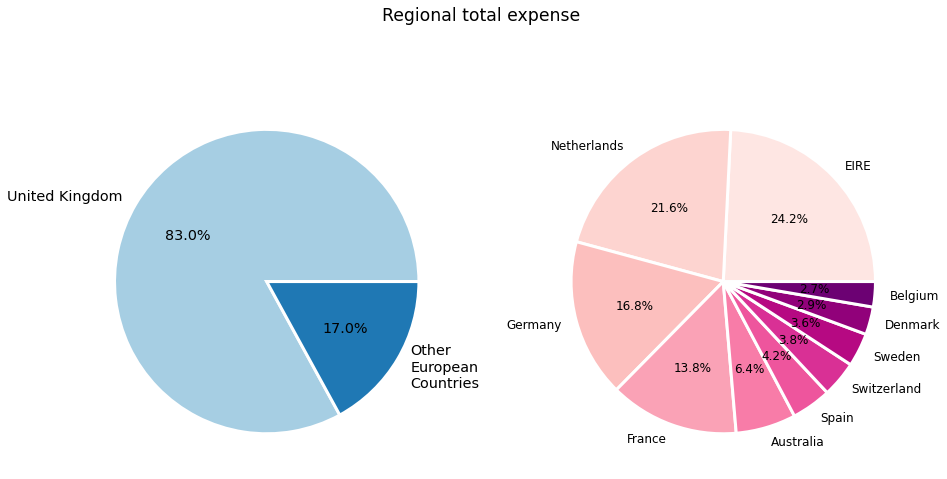

In [501]:
figure, axes = plt.subplots(1, 2, figsize=(15, 8))
figure.suptitle('Regional total expense', fontsize='xx-large')
sequential_colors = sns.color_palette("RdPu", 10)
axes[0].pie(x=uk_vs_rest, labels=['United Kingdom', 'Other\nEuropean\nCountries'], autopct='%.1f%%',
            colors=sns.color_palette("Paired", 9),
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            textprops={'size': 'x-large'})
axes[1].pie(x=rest['total_expense'], labels=rest['country'],  autopct='%.1f%%', colors=sequential_colors,
           wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
           textprops={'size': 'large'})
plt.show()

- Typical interval of time betwee two purchases?

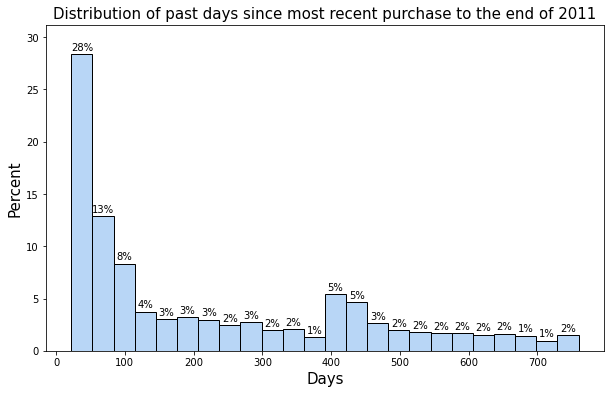

In [290]:
plt.figure(figsize=(10, 6))
fg = sns.histplot(df_agg['date_diff'],bins=24, stat='percent')

for c in fg.axes.containers:
    labels=[f'{w:.0f}%' if (w := v.get_height())>0 else '' for v in c]
    fg.axes.bar_label(c, labels=labels, label_type='edge', fontsize=10, padding=2,
#                      rotation=30
                     )
fg.axes.margins(y=0.1)
plt.xlabel('Days', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('Distribution of past days since most recent purchase to the end of 2011', fontsize=15)
plt.show()

- Which day of the week has the highest expense? has the most number of invoices? Which monthy of a year?
- What is the yearly sales trend over all years and all countries? per country?
- Which product has the most sales?

In [48]:
df_agg.loc[:, 'year'] = pd.DatetimeIndex(df_agg['most_recent_purchase']).year
df_agg.loc[:, 'month'] = pd.DatetimeIndex(df_agg['most_recent_purchase']).month

In [49]:
df_agg.head()

,customer_id,most_recent_purchase,total_number_of_purchase,total_expense,country,date_diff,recency_level,frequency_level,total_expense_level,high_value_churned,year,month
0,12346.0,2011-01-18,34,77556.46,United Kingdom,347,3.0,3.0,1.0,0.0,2011,1
1,12347.0,2011-12-07,253,5633.32,Iceland,24,1.0,1.0,1.0,0.0,2011,12
2,12348.0,2011-09-25,51,2019.40,Finland,97,2.0,3.0,1.0,0.0,2011,9
3,12349.0,2011-11-21,175,4428.69,Italy,40,1.0,1.0,1.0,0.0,2011,11
4,12350.0,2011-02-02,17,334.40,Norway,332,3.0,4.0,2.0,0.0,2011,2


In [58]:
df_agg_year = df_agg.groupby('year')['total_expense'].sum().to_frame()
df_agg_year.reset_index(inplace=True)

In [65]:
df_agg_year

,year,total_expense
0,2009,2.345243e+04
1,2010,1.338573e+06
2,2011,1.638140e+07


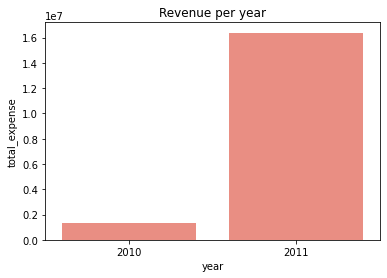

In [70]:
sns.barplot(data=df_agg_year[1:],x='year', y = 'total_expense', color='salmon')
plt.title('Revenue per year')
plt.show()

In [102]:
df_agg_2010 = df_agg[df_agg['year']==2010]
df_agg_month_2010 = df_agg_2010.groupby('month')['total_expense'].sum().to_frame()
df_agg_month_2010.reset_index(inplace=True)

df_agg_2011 = df_agg[df_agg['year']==2011]
df_agg_month_2011 = df_agg_2011.groupby('month')['total_expense'].sum().to_frame()
df_agg_month_2011.reset_index(inplace=True)

In [110]:
# plt.plot(df_agg_month_2010['month'], df_agg_month_2010['total_expense'])
# plt.plot(df_agg_month_2011['month'], df_agg_month_2011['total_expense'])